# ADP Projekt

Łukasz Gałuszewski, Mateusz Dominiak, Szymon Giergiel


In [10]:
print("Hello World!")
import geopandas as gpd
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt


Hello World!


In [3]:
granicewoj = gpd.read_file('data/Granice województw/A01_Granice_wojewodztw.shp')

replace_dict = {
    'pomorskie': 'Pomorskie',
    'maÅopolskie': 'Małopolskie',
    'ÅÃ³dzkie': 'Łódzkie',
    'warmiÅsko-mazurskie': 'Warmińsko-Mazurskie',
    'lubuskie': 'Lubuskie',
    'opolskie': 'Opolskie',
'dolnoÅlÄskie': 'Dolnośląskie',
    'ÅwiÄtokrzyskie': 'Świętokrzyskie',
    'zachodniopomorskie': 'Zachodniopomorskie',
    'kujawsko-pomorskie': 'Kujawsko-Pomorskie',
    'ÅlÄskie': 'Śląskie',
    'podlaskie': 'Podlaskie',
    'wielkopolskie': 'Wielkopolskie',
    'mazowieckie': 'Mazowieckie',
    'lubelskie': 'Lubelskie',
    'podkarpackie': 'Podkarpackie'
}

granicewoj['JPT_NAZWA_'] = granicewoj['JPT_NAZWA_'].replace(replace_dict)

In [7]:
ludnosc = gpd.read_file('polskieludy2021.gpkg')

granicewoj = granicewoj.to_crs(ludnosc.crs)

ludnosc_z_woj = gpd.sjoin(ludnosc, granicewoj, how="inner")

pop_per_wojewodztwo = ludnosc_z_woj.groupby("JPT_NAZWA_")["TOT_P_2021"].sum().reset_index()

pop_per_wojewodztwo = pop_per_wojewodztwo.sort_values(by="TOT_P_2021", ascending=False)

granicewoj["populacja"] = granicewoj["JPT_NAZWA_"].map(pop_per_wojewodztwo.set_index("JPT_NAZWA_")["TOT_P_2021"])

## Populacja województw w Polsce

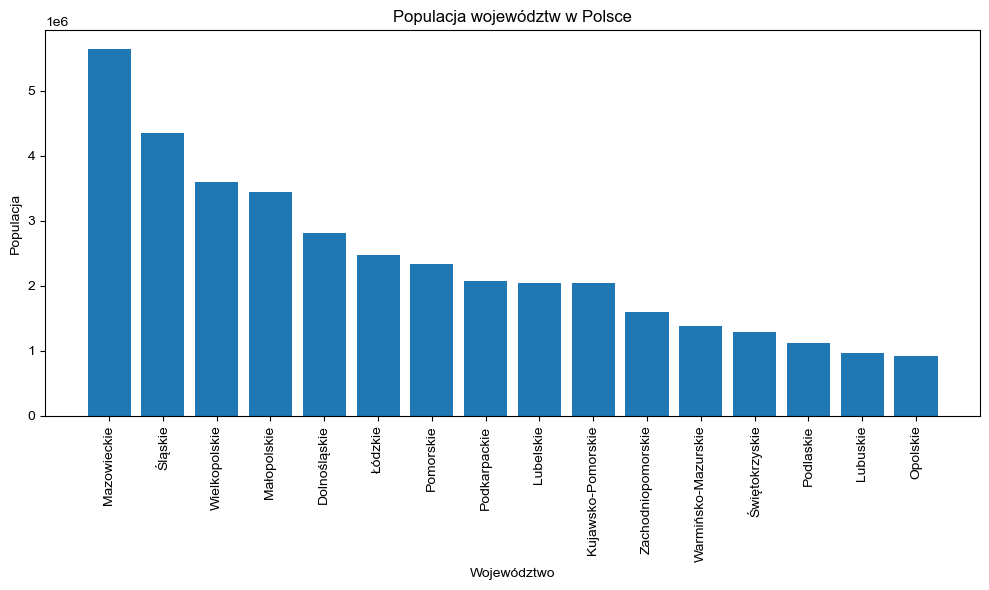

In [137]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(pop_per_wojewodztwo["JPT_NAZWA_"], pop_per_wojewodztwo["TOT_P_2021"])
plt.xlabel('Województwo')
plt.ylabel('Populacja')
plt.title('Populacja województw w Polsce')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
# granicewoj.plot()

In [5]:
# ludnosc.crs

In [3]:
# granicewoj

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from matplotlib.colors import ListedColormap
#
# fig = plt.figure(figsize=(20, 10))
#
# ax = fig.add_subplot(111)
#
# colors = ['#0C4DA2', '#739DD3', '#FFE5C1', '#FECF8C', '#F36F21']
# custom_cmap = ListedColormap(colors)
#
# countries.plot(ax=ax, color='lightgray', edgecolor='darkgray', alpha=0.5, linewidth=0.25)
# pop_density.plot(column='PopDen_Change_cl_2014_2017', cmap=custom_cmap, edgecolor='black', linewidth=0.3, ax=ax)
# nan_density.plot(color='gray', ax=ax)
#
# regions = ['Ciudad Autónoma de Melilla',
#            'Região Autónoma dos Açores',
#            'Ciudad Autónoma de Ceuta',
#            'Malta',
#            'Canarias',
#            'Região Autónoma da Madeira'
#            ]
# regions_names = {'Ciudad Autónoma de Melilla': 'Melilla (ES)',
#                  'Região Autónoma dos Açores': ' Açores (PT)',
#                  'Ciudad Autónoma de Ceuta': 'Ceuta (ES)',
#                  'Malta': 'Malta',
#                  'Canarias': 'Canarias (ES)',
#                  'Região Autónoma da Madeira': 'Madeira (PT)'
#                  }
#
# inset_positions = [
#     [0.71, 0.72, 0.12, 0.1],
#     [0.61, 0.52, 0.12, 0.1],
#     [0.61, 0.72, 0.12, 0.1],
#     [0.71, 0.52, 0.12, 0.1],
#     [0.61, 0.32, 0.12, 0.1],
#     [0.71, 0.32, 0.12, 0.1]
# ]
#
# for i, region in enumerate(regions):
#     region_data = pop_density[pop_density['NUTS_NAME'] == region]
#
#     x, y, width, height = inset_positions[i]
#
#     inset_ax = fig.add_axes([x, y, width, height])
#
#     class_num = region_data['PopDen_Change_cl_2014_2017'].iloc[0]
#     color = colors[int(class_num) - 1]
#
#     region_data.plot(
#         color=color,
#         edgecolor='black',
#         linewidth=0.2,
#         ax=inset_ax,
#         figsize=(4, 4))
#
#     inset_ax.set_title(regions_names[region], fontsize=8)
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#
# patches = [
#     mpatches.Patch(color=colors[0], label=' < -5%'),
#     mpatches.Patch(color=colors[1], label=' 0% – -5%'),
#     mpatches.Patch(color=colors[2], label=' 5% – 0%'),
#     mpatches.Patch(color=colors[3], label=' 10% – 5%'),
#     mpatches.Patch(color=colors[4], label=' > 10%'),
#     mpatches.Patch(color='gray', label='Missing Data (NaN)')
# ]
# ax.legend(handles=patches, loc='center left', fontsize=10, title='Population density change\n2014 - 2017',
#           title_fontsize=12)
#
# ax.text(0.025, 0.045, 'Data source: Eurostat', transform=ax.transAxes, fontsize=12, ha='left', va='bottom',
#         color='black')
# ax.axis('off')
#
# x_min, y_min, x_max, y_max = pop_density.total_bounds
# ax.set_xlim(x_min * 0.9, x_max * 1.3)
# ax.set_ylim(y_min * 1.25, y_max)
#
# plt.tight_layout()
# plt.show()

In [ ]:
# tooltip = folium.features.GeoJsonTooltip(
#     fields=("name",),
#     aliases=("Nazwa szkoły: ",)
# )
#
# points_geojson = folium.features.GeoJson(szkoly, tooltip=tooltip,
#                                          name="Rozmieszczenie szkoly w polsce",
#                                          control=True)
# dates_layer = folium.FeatureGroup(name="Romieszczenie szkół w kraju", control=True, overlay=True, show=False)
# points_geojson.add_to(dates_layer)
# dates_layer.add_to(m)

In [ ]:
# tooltip = folium.features.GeoJsonTooltip(
#     fields=("date",),
#     aliases=("Observation date:",)
# )
#
# points_geojson = folium.features.GeoJson(observations,tooltip=tooltip,
#                                          name="Observation Points",
#                                          control=True)
#
# dates_layer = folium.FeatureGroup(name="Raven sightings dates", control=True, overlay=True, show=False)
# points_geojson.add_to(dates_layer)
# dates_layer.add_to(m)


In [ ]:
# from folium.plugins import HeatMap
#
# observations['latitude'] = observations.geometry.y
# observations['longitude'] = observations.geometry.x
#
# heat_data = observations[['latitude', 'longitude', 'amount']].values.tolist()
#
# heatmap_layer = folium.FeatureGroup(name="Raven sightings heatmap", control=True, overlay=True, show=False)
# HeatMap(heat_data).add_to(heatmap_layer)
# heatmap_layer.add_to(m)


## Ilość placówek edukacyjnych z podziałem na wojewodztwa.

In [8]:
szkoly = gpd.read_file("polska_szkoly.gpkg")

In [141]:
szkoly_copy = szkoly.to_crs(granicewoj.crs).copy()
szkoly_woj = gpd.sjoin(szkoly_copy, granicewoj, how="inner")
liczba_szkol = szkoly_woj.groupby("JPT_NAZWA_").size().reset_index(name="liczba_szkol")

granicewoj["liczba_szkol"] = granicewoj["JPT_NAZWA_"].map(liczba_szkol.set_index("JPT_NAZWA_")["liczba_szkol"])
granicewoj = granicewoj.sort_values(by="liczba_szkol", ascending=False)


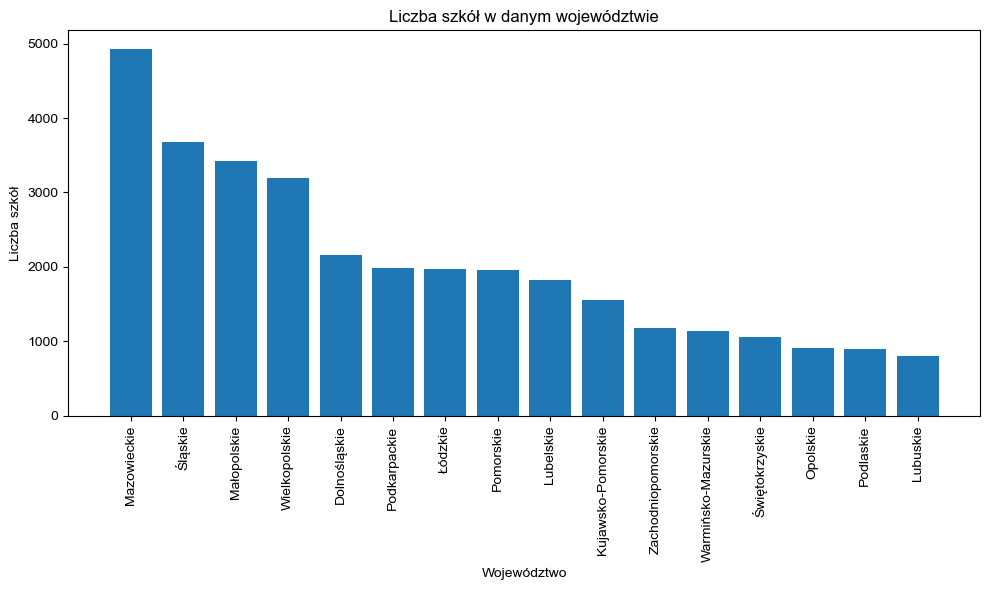

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(granicewoj["JPT_NAZWA_"], granicewoj["liczba_szkol"])
plt.xlabel('Województwo')
plt.ylabel('Liczba szkół')
plt.title('Liczba szkół w danym województwie')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Liczba szkół przypadajacych na jednego mieszkańca w danym województwie.

In [145]:
granicewoj["szkol_na_mieszkanca"] = granicewoj["populacja"]/ granicewoj["liczba_szkol"]


<Figure size 1200x800 with 0 Axes>

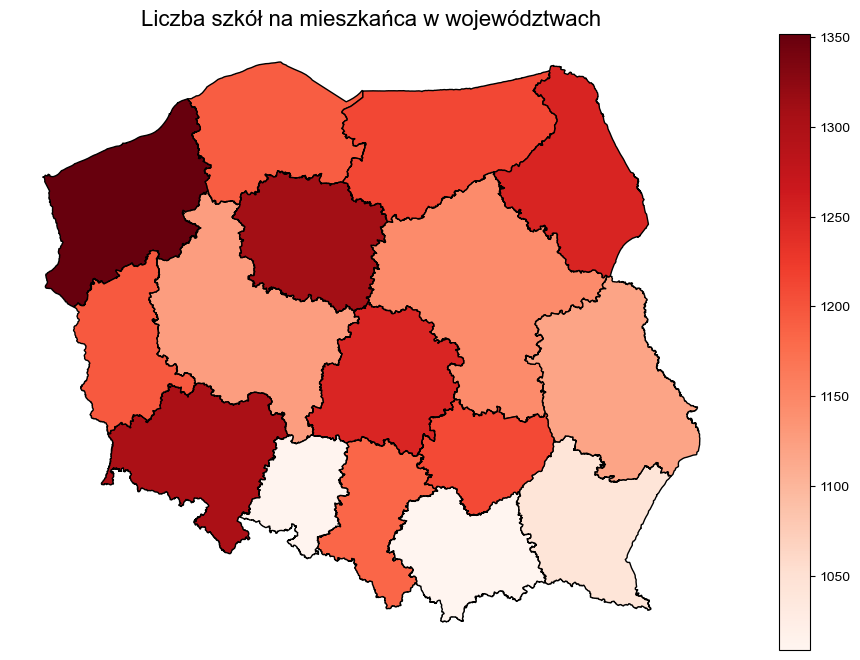

In [148]:
plt.figure(figsize=(12, 8))
ax = granicewoj.plot(
    column="szkol_na_mieszkanca",
    cmap="Reds",
    legend=True,
    figsize=(12, 8),
    edgecolor="black"
)

# Dostosowanie tytułu i opisów
ax.set_title("Liczba mieszkańców na jedną szkołę w województwach", fontsize=16)
ax.set_axis_off()

# Wyświetlenie mapy
plt.show();

## Proceny udziału szkół publicznych i prywatnych zależnie od poziomu edukacji.

In [51]:
statystyki = szkoly.groupby(["levels", "public_private"]).size().reset_index(name="liczba_szkol")

ogolna_liczba_szkol = statystyki.groupby("levels")["liczba_szkol"].sum().reset_index(name="ogolna_liczba_szkol")

prywatne_szkoly = statystyki[statystyki["public_private"] == "PRIVATE"]

ogolna_liczba_przedszkoli = ogolna_liczba_szkol[ogolna_liczba_szkol["levels"].isin(["0"])]
prywatne_przedszkola = prywatne_szkoly[prywatne_szkoly["levels"].isin(["0"])]

ogolna_liczba_podst = ogolna_liczba_szkol[ogolna_liczba_szkol["levels"].isin(["1"])]
prywatne_podst = prywatne_szkoly[prywatne_szkoly["levels"].isin(["1"])]

ogolna_liczba_srednich = ogolna_liczba_szkol[ogolna_liczba_szkol["levels"].isin(["2"])]
prywatne_srednie = prywatne_szkoly[prywatne_szkoly["levels"].isin(["2"])]


proc_przedsz = prywatne_przedszkola['liczba_szkol'].iloc[0] / ogolna_liczba_przedszkoli['ogolna_liczba_szkol'].iloc[0] * 100

proc_podst = prywatne_podst['liczba_szkol'].iloc[0] / ogolna_liczba_podst['ogolna_liczba_szkol'].iloc[0] * 100

proc_sred = prywatne_srednie['liczba_szkol'].iloc[0] / ogolna_liczba_srednich['ogolna_liczba_szkol'].iloc[0] * 100

proc_przedsz, proc_podst, proc_sred


(42.508292751782065, 11.879049676025918, 34.346357935359386)

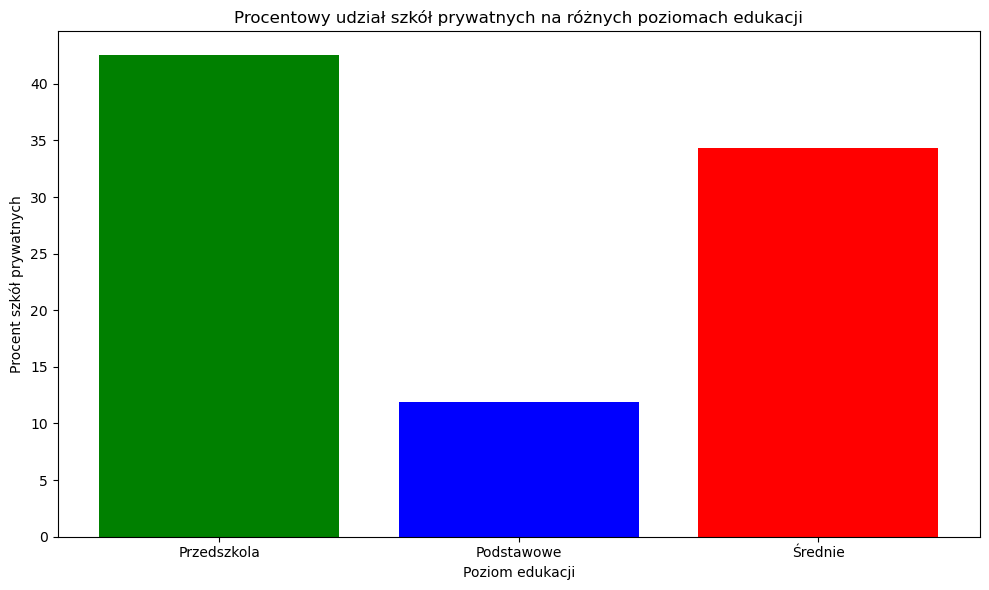

In [53]:

data = {
    'Level': ['Przedszkola', 'Szkoły Podstawowe', 'Szkoły Średnie'],
    'Percentage': [proc_przedsz, proc_podst, proc_sred]
}

df = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Level'], data['Percentage'], color=['green', 'blue', 'red'])
plt.xlabel('Poziom edukacji')
plt.ylabel('Procent szkół prywatnych')
plt.title('Procentowy udział szkół prywatnych na różnych poziomach edukacji')
# plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.tight_layout()
plt.show()




## Procentowy udział placówek prywatnych i publicznych w danym województwie.

In [152]:
liczba_pryw = szkoly['public_private'].value_counts()
liczba_pryw

public_private
PUBLIC     23516
PRIVATE     9152
Name: count, dtype: int64

In [6]:
# szkoly_woj

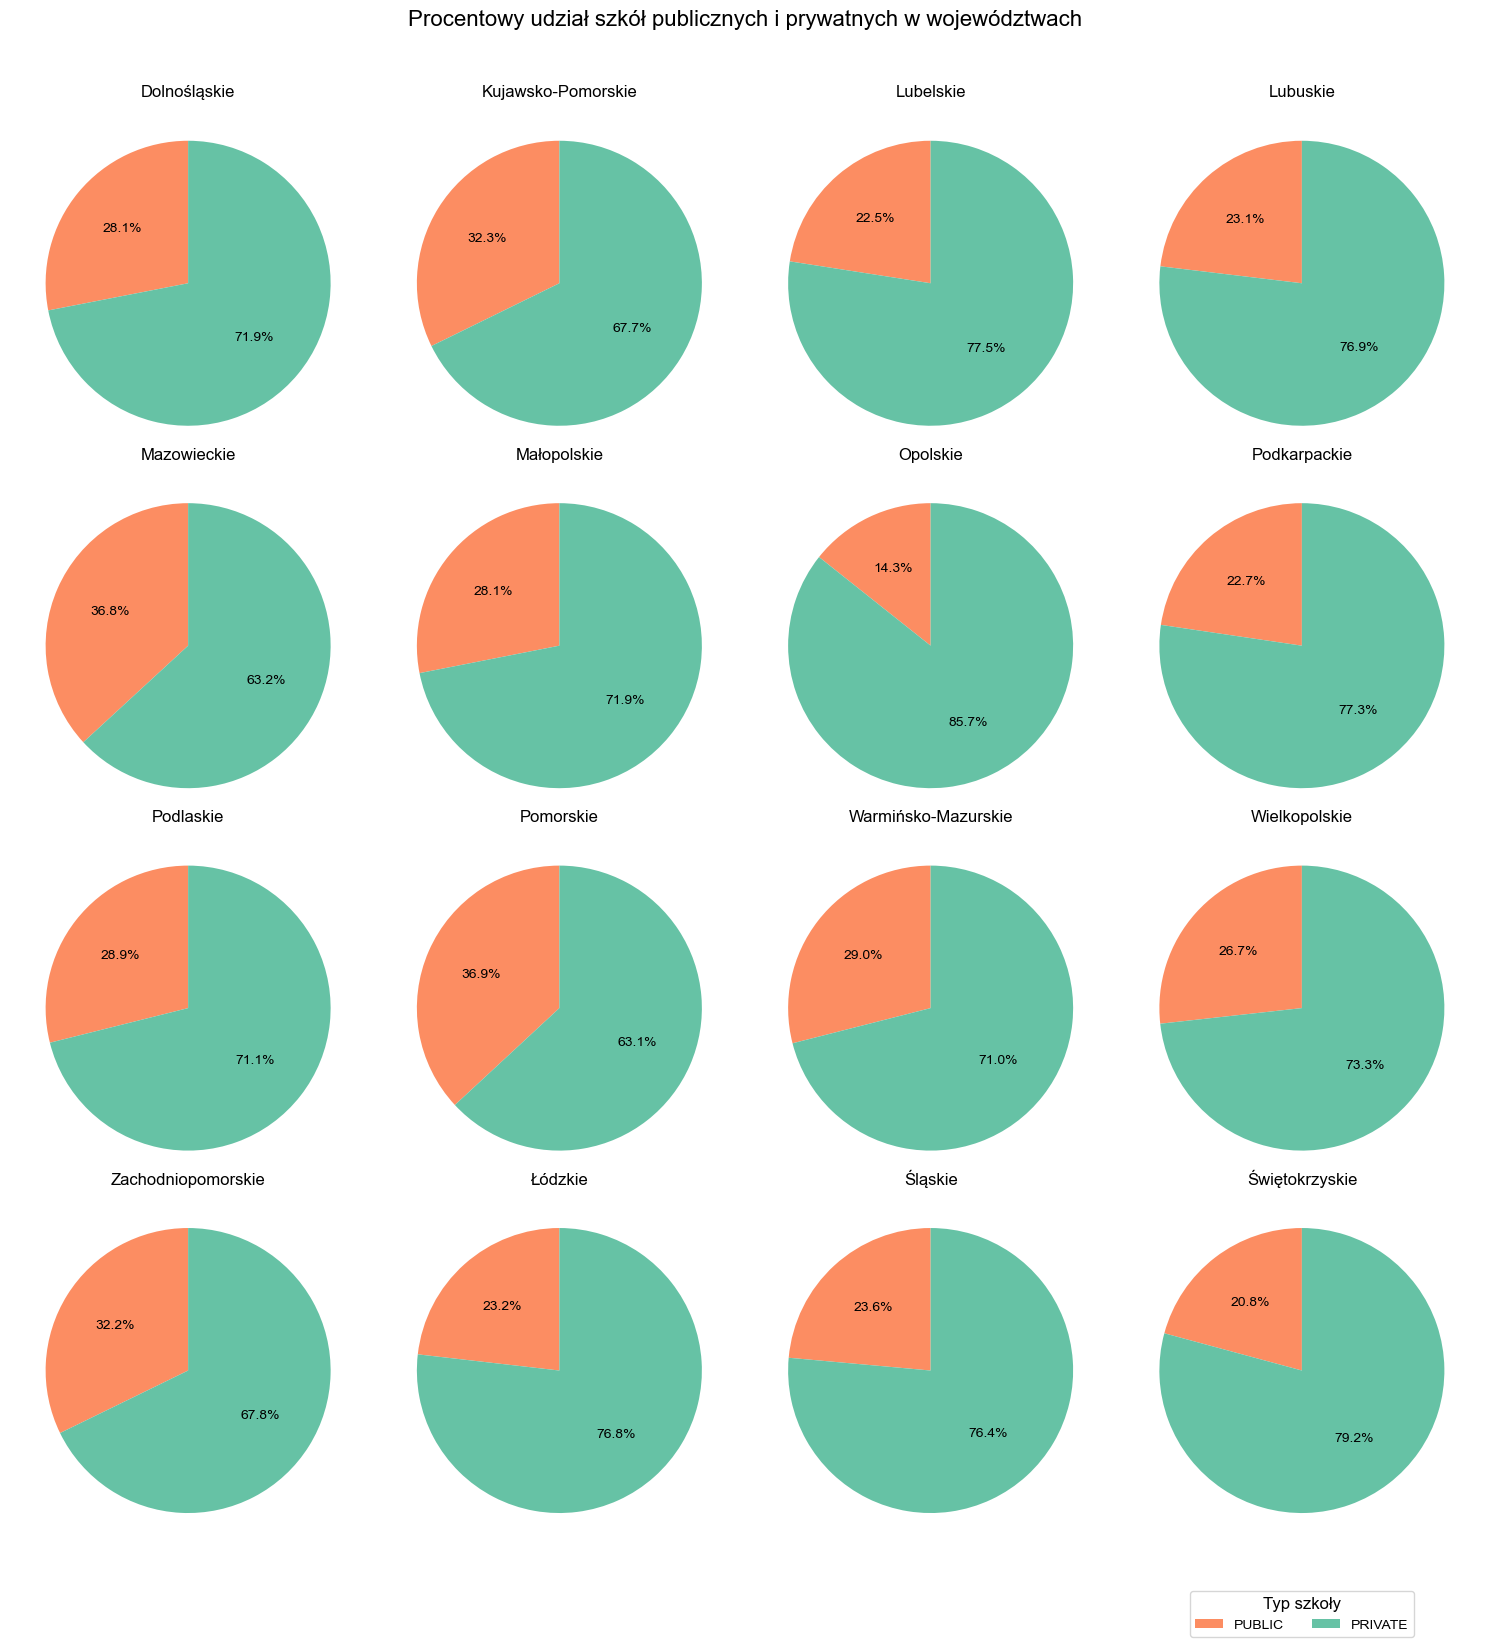

In [170]:
import matplotlib.pyplot as plt

# Grupa danych według województw i typu szkół (publiczne/prywatne)
liczba_szkol_typ = szkoly_woj.groupby(["JPT_NAZWA_", "public_private"]).size().reset_index(name="liczba_szkol")

# Lista unikalnych województw
wojewodztwa = liczba_szkol_typ["JPT_NAZWA_"].unique()

# Kolory dla typów szkół
colors = {'PUBLIC': '#66c2a5', 'PRIVATE': '#fc8d62'}

# Tworzenie wykresów kołowych dla każdego województwa
plt.figure(figsize=(15, 20))  # Dopasowanie rozmiaru figury
for i, woj in enumerate(wojewodztwa, 1):
    # Filtrowanie danych dla danego województwa
    dane_woj = liczba_szkol_typ[liczba_szkol_typ["JPT_NAZWA_"] == woj]

    # Dane do wykresu kołowego
    labels = dane_woj["public_private"]
    sizes = dane_woj["liczba_szkol"]

    # Tworzenie subplotu
    plt.subplot(4, 4, i)  # Siatka: 5 wierszy, 3 kolumny (dostosuj do liczby województw)
    plt.pie(
        sizes,
        labels=None,  # Ukrywamy etykiety na samym wykresie
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[label] for label in labels]
    )
    plt.title(woj, fontsize=12)  # Zwiększenie czcionki tytułu

# Dodanie wspólnej legendy dla wszystkich wykresów
plt.legend(
    labels=colors.keys(),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),  # Pozycja poniżej wykresów
    ncol=2,
    title='Typ szkoły',
    fontsize=10,
    title_fontsize=12
)

# Dostosowanie layoutu
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Zmniejszenie marginesów, aby zmieścić całość
plt.suptitle('Procentowy udział szkół publicznych i prywatnych w województwach', fontsize=16)
plt.subplots_adjust(bottom=0.2)  # Więcej miejsca na dole dla legendy
plt.show()


In [176]:
szkoly_woj

,id,name,site_name,lat,lon,street,house_number,postcode,address,city,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGONREGON,populacja,liczba_szkol
0,PL_127213,"""AKADEMIA POZIOMKOWA"" PRZEDSZKOLE NIEPUBLICZNE",None,51.007540,22.702781,UL. TADEUSZA KOŚCIUSZKI,12,23-110,None,KRZCZONÓW,...,1364432,0.0,None,0.0,0.0,14.110344,3.232312,43101917000000,2040433,1823
1,PL_22593,"""AKADEMIA PRZEDSZKOLAKA"" NIEPUBLICZNE PRZEDSZKOLE",None,50.435550,16.642670,UL. RODZINNA,61,57-300,None,KŁODZKO,...,1369423,0.0,None,0.0,0.0,13.846008,2.559170,93193464400000,2812414,2160
2,PL_270458,"""AKADEMIA PRZEDSZKOLAKA"" PRYWATNE PRZEDSZKOLE ...",None,50.535280,22.724980,UL. ALEJA 400-LECIA,4,23-400,None,BIŁGORAJ,...,1364432,0.0,None,0.0,0.0,14.110344,3.232312,43101917000000,2040433,1823
3,PL_32020,"""AKADEMIA PRZEDSZKOLAKA"" PRZEDSZKOLE NIEPUBLICZNE",None,50.293470,18.654440,UL. TADEUSZA KOŚCIUSZKI,25,44-100,None,GLIWICE,...,1368876,0.0,None,0.0,0.0,12.129197,1.557333,27625465000000,4350292,3674
4,PL_77963,"""AKADEMIA PRZEDSZKOLAKA"" PRZEDSZKOLE PRYWATNE ...",None,51.449797,22.613457,UL. 1 MAJA,35,21-100,None,LUBARTÓW,...,1364432,0.0,None,0.0,0.0,14.110344,3.232312,43101917000000,2040433,1823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32663,PL_128758,SZKOŁA PODSTAWOWA IM. BOHATERÓW WESTERPLATTE W...,None,52.118181,16.780172,BOROWO,"49, 76",64-020,None,BOROWO,...,1369422,0.0,None,0.0,0.0,18.409706,3.932199,63125781600000,3590743,3189
32664,PL_4048,SZKOŁA PODSTAWOWA NR 1 IM. HENRYKA SIENKIEWICZA,None,52.106575,20.629277,UL. W. BARTNIAKA,13A,05-825,None,GRODZISK MAZOWIECKI,...,1364209,0.0,None,0.0,0.0,20.218656,4.689459,01552891000000,5643437,4931
32665,PL_109446,SZKOŁA PODSTAWOWA NR 1 IM.KRÓLOWEJ JADWIGI W H...,None,49.680619,22.044591,RONDO RONDO ABP. IGNACEGO TOKARCZUKA,264,36-206,None,HUMNISKA,...,1366391,0.0,None,0.0,0.0,11.222432,2.235693,69058132400000,2069464,1985
32666,PL_109460,SZKOŁA PODSTAWOWA NR 2IM.I.ŁUKASIEWICZAW HUMNI...,None,49.680619,22.044591,RONDO RONDO ABP. IGNACEGO TOKARCZUKA,877,36-206,None,HUMNISKA,...,1366391,0.0,None,0.0,0.0,11.222432,2.235693,69058132400000,2069464,1985


In [178]:

# # Grupa danych według województw i typu szkół (publiczne/prywatne)
# szkoly_woj_copy = szkoly_woj[szkoly_woj["levels"].isin(["1", "2"])]
# liczba_szkol_typ = szkoly_woj_copy.groupby(["JPT_NAZWA_", "public_private"]).size().reset_index(name="liczba_szkol")
#
#
#
# # Lista unikalnych województw
# wojewodztwa = liczba_szkol_typ["JPT_NAZWA_"].unique()
#
# # Kolory dla typów szkół
# colors = {'PUBLIC': '#66c2a5', 'PRIVATE': '#fc8d62'}
#
# # Tworzenie wykresów kołowych dla każdego województwa
# plt.figure(figsize=(15, 20))  # Dopasowanie rozmiaru figury
# for i, woj in enumerate(wojewodztwa, 1):
#     # Filtrowanie danych dla danego województwa
#     dane_woj = liczba_szkol_typ[liczba_szkol_typ["JPT_NAZWA_"] == woj]
#
#     # Dane do wykresu kołowego
#     labels = dane_woj["public_private"]
#     sizes = dane_woj["liczba_szkol"]
#
#     # Tworzenie subplotu
#     plt.subplot(4, 4, i)  # Siatka: 5 wierszy, 3 kolumny (dostosuj do liczby województw)
#     plt.pie(
#         sizes,
#         labels=None,  # Ukrywamy etykiety na samym wykresie
#         autopct='%1.1f%%',
#         startangle=90,
#         colors=[colors[label] for label in labels]
#     )
#     plt.title(woj, fontsize=12)  # Zwiększenie czcionki tytułu
#
# # Dodanie wspólnej legendy dla wszystkich wykresów
# plt.legend(
#     labels=colors.keys(),
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.1),  # Pozycja poniżej wykresów
#     ncol=2,
#     title='Typ szkoły',
#     fontsize=10,
#     title_fontsize=12
# )
# #
# # Dostosowanie layoutu
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Zmniejszenie marginesów, aby zmieścić całość
# plt.suptitle('Procentowy udział szkół publicznych i prywatnych w województwach z wyłączeniem przedszkoli', fontsize=16)
# plt.subplots_adjust(bottom=0.2)  # Więcej miejsca na dole dla legendy
# plt.show()

In [173]:
# liczba_szkol_typ

,JPT_NAZWA_,public_private,liczba_szkol
0,Dolnośląskie,PRIVATE,606
1,Dolnośląskie,PUBLIC,1554
2,Kujawsko-Pomorskie,PRIVATE,501
3,Kujawsko-Pomorskie,PUBLIC,1052
4,Lubelskie,PRIVATE,411
5,Lubelskie,PUBLIC,1412
6,Lubuskie,PRIVATE,186
7,Lubuskie,PUBLIC,619
8,Mazowieckie,PRIVATE,1817
9,Mazowieckie,PUBLIC,3114


## Rozmieszczenie analizowanych jednostek edukacyjnych na terenie kraju.


In [ ]:
import folium

m = folium.Map(location=[52.04, 19.28], zoom_start=7,
               tiles='OpenStreetMap',
               control_scale=True)



In [ ]:
from folium.plugins import MarkerCluster


def icon_color(observer):
    colors = {
        '0': 'green',
        '1': 'blue',
        '2': 'red'
    }
    return colors.get(observer)


def icon_sign(amount):
    return 'angle-down' if int(amount) <= 100 else 'angles-down'


def education_level(amount):
    poziom = {
        '0': 'Przedszkolny',
        '1': 'Podstawowy',
        '2': 'Średni'
    }
    return poziom.get(amount)


cluster_layer = folium.FeatureGroup(name="Rozmieszczenie szkół w kraju", control=True, overlay=True, show=False)
marker_cluster = MarkerCluster().add_to(cluster_layer)

for _, row in szkoly.iterrows():
    coord = (row['geometry'].y, row['geometry'].x)

    nazwa_szkoly = row['name']
    poziom_szkoly = row['levels']
    liczba_uczniow = row['enrollment']
    pryw_pub = row['public_private']

    folium.Marker(
        location=coord,
        popup=f"""
    <div style="width: 240px; height: 60px; overflow: auto;">
        <b>Nazwa: </b> {nazwa_szkoly}<br>
        <b>Poziom edukacji: </b> {education_level(poziom_szkoly)}<br>
        <b>Liczba uczniów: </b> {liczba_uczniow}<br>
        <b>Typ: </b> {pryw_pub}<br>
    </div>
""",
        icon=folium.Icon(color=icon_color(poziom_szkoly), icon=icon_sign(liczba_uczniow), prefix='fa'),
    ).add_to(marker_cluster)

cluster_layer.add_to(m)


In [19]:
szkoly['levels'].value_counts()

levels
1    14353
0    14169
2     4146
Name: count, dtype: int64

In [ ]:
folium.LayerControl().add_to(m)

In [ ]:
m

In [93]:
m2 = folium.Map(location=[52.04, 19.28], zoom_start=7,
                tiles='OpenStreetMap',
                control_scale=True)


In [153]:
# szkoly.crs

In [103]:
szkoly_bez_srednich = []
counter = 0
# Re-project to a projected CRS (e.g., EPSG:3857)
szkoly_podstawowe = szkoly[szkoly['levels'] == '1'].to_crs(epsg=2180).copy()
szkoly_srednie = szkoly[szkoly['levels'] == '2'].to_crs(epsg=2180)

# Perform the buffer operation (30 km)
szkoly_podstawowe['buffer_20km'] = szkoly_podstawowe.geometry.buffer(20000)

for i, row in szkoly_podstawowe.iterrows():
    if szkoly_srednie[szkoly_srednie.geometry.within(row['buffer_20km'])].empty:
        szkoly_bez_srednich.append(row)
        counter = counter + 1

counter

57

In [98]:
szkoly_bez_srednich_df = pd.DataFrame(szkoly_bez_srednich)
szkoly_bez_srednich_df = szkoly_bez_srednich_df.drop(columns='buffer_30km').copy()
szkoly_bez_srednich_gdf = gpd.GeoDataFrame(szkoly_bez_srednich_df, crs='EPSG:4326')
szkoly_bez_srednich_gdf["geometry"] = gpd.points_from_xy(szkoly_bez_srednich_gdf['lon'], szkoly_bez_srednich_gdf['lat'])


# # Assuming 'szkoly_bez_srednich' has 'latitude' and 'longitude' columns
# szkoly_bez_srednich = gpd.GeoDataFrame(szkoly_bez_srednich.drop(columns='buffer_30km').copy(),
#                                        crs='EPSG:4326',
#                                        geometry=gpd.points_from_xy(szkoly_bez_srednich['long'], szkoly_bez_srednich['lat']))


In [149]:
# szkoly_bez_srednich_gdf

In [100]:
tooltip = folium.features.GeoJsonTooltip(
    fields=("name",),
    aliases=("Nazwa szkoły: ",)
)

points_geojson = folium.features.GeoJson(szkoly_bez_srednich_gdf, tooltip=tooltip,
                                         name="Rozmieszczenie szkoly w polsce",
                                         control=True)
odlegle = folium.FeatureGroup(name="Romieszczenie szkół w kraju", control=True, overlay=True, show=False)
points_geojson.add_to(odlegle)
odlegle.add_to(m2)

In [101]:
folium.LayerControl().add_to(m2)

In [102]:
m2

In [ ]:
szkoy = gpd.read_file("polska_szkoly.gpkg")

C:\Users\user\AppData\Local\Temp\ipykernel_21060\1325180980.py:41: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


<Figure size 1000x1000 with 0 Axes>

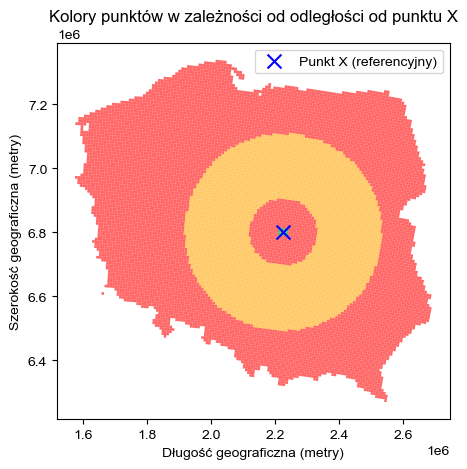

In [182]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Punkt referencyjny (np. współrzędne punktu X)
punkt_X = Point(20.0, 52.0)  # np. Warszawa w EPSG:4326

# Załaduj dane dotyczące punktów gęstości zaludnienia
punkty = gpd.read_file("polskieludy2021.gpkg")

# Upewnij się, że dane są w CRS geograficznym (EPSG:4326), a następnie przekształć na układ metryczny
punkty = punkty.to_crs(epsg=3857)
punkt_X = gpd.GeoSeries([punkt_X], crs="EPSG:4326").to_crs(epsg=3857).iloc[0]

# Oblicz odległości od punktu X
punkty["distance_km"] = punkty.geometry.distance(punkt_X) / 1000  # Odległość w kilometrach

# Przypisz kolory w zależności od odległości
def assign_color(distance):
    if distance <= 10:
        return "green"
    elif 10 < distance <= 303:
        return "orange"
    else:
        return "red"

punkty["color"] = punkty["distance_km"].apply(assign_color)

# Wizualizacja na mapie
plt.figure(figsize=(10, 10))
base = punkty.plot(
    color=punkty["color"], alpha=0.6, markersize=10, legend=True, label="Punkty"
)
plt.scatter(
    punkt_X.x, punkt_X.y, color="blue", marker="x", s=100, label="Punkt X (referencyjny)"
)
plt.axis("off")
plt.title("Kolory punktów w zależności od odległości od punktu X")

plt.legend()
plt.tight_layout()
plt.show()
